In [1]:
#pandas and numpy package
import pandas as pd
import numpy as np

In [2]:
#reading match_analysis
df_match=pd.read_csv('C:/Users/Mayank Gupta/Desktop/IPL_analysis/Datasets/match_data.csv') 

In [3]:
#All the matches MI played
df_mi=df_match[df_match.team1_id=='MI'] 
df_mi_2=df_match[df_match.team2_id=='MI']
df_mi_matches=pd.concat([df_mi,df_mi_2]) #All the matches MI played 

In [4]:
#to find the season wise wins of MI
import sys
wins=[]
season=[]
for i in range(2008,2018):
    seasonwisewins=df_mi_matches[df_mi_matches.season==i]
    season.append(i)
    wins.append(len(seasonwisewins[df_mi_matches.winner=='MI']))

C:\Users\Mayank Gupta\AppData\Local\Continuum\Anaconds\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [5]:
dictionary_mi_wins = dict(zip(season, wins)) #dictionary containing season and number wins

In [6]:
dictionary_mi_wins

{2008: 7,
 2009: 5,
 2010: 11,
 2011: 10,
 2012: 10,
 2013: 13,
 2014: 7,
 2015: 10,
 2016: 7,
 2017: 12}

In [7]:
season=list(map(str,season)) #convert list of int to list of strings

<b>We can see that leaving few easons MI has been the most consistent team of IPL </b>

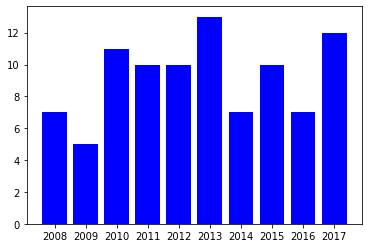

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

names = list(dictionary_mi_wins.keys())
values = list(dictionary_mi_wins.values())

#tick_label does the some work as plt.xticks()
plt.bar(range(len(dictionary_mi_wins)),values,tick_label=names,color='blue')
plt.show()

In [10]:
# Standard plotly imports
import chart_studio 
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode,plot
import cufflinks as cf
cf.go_offline(connected=True)
init_notebook_mode(connected=True)


<b>Let us see MI performance in and away from home Did it had a huge impact on their success Let us Find Out..</b>

In [12]:
wins=df_mi_matches[df_mi_matches.winner=='MI']  
wins_At_home=wins[wins.city=='Mumbai']
count_home=len(wins_At_home)
wins_away=wins[wins.city!='Mumbai']
count_away=len(wins_away)
labels = ['Home Wins','Away Wins']
values = [count_home,count_away]
trace = go.Pie(labels=labels, values=values)
iplot([trace], filename='basic_pie_chart',show_link=False)

<b>Of all the matches MI won there 51% wins were from away games <br>Now Let us see toss dependency on MI success</b>

In [13]:
toss_wins_match=wins[wins.toss_winner=='MI']
len(toss_wins_match)


48

In [14]:
loss_wins_match=wins[wins.toss_winner!='MI']
len(loss_wins_match)

44

<b>Toss doesnot matter much for MI. They have won 48 matches when the won the toss and 44 while losing the toss</b>

In [15]:
matches_won_batting_first=wins[wins.win_by_runs>0]
batting_first=len(matches_won_batting_first)
matches_won_chasing=wins[wins.win_by_wickets>0]
batting_second=len(matches_won_chasing)

In [16]:
print(batting_first)
print(batting_second)

47
44


<b>So MI has won 47 matches batting first and 44 matches while chasing. Let us see what happened in last 4 seasons</b>

In [17]:
wins_season_2014=wins[wins.season==2014]
wins_season_2015=wins[wins.season==2015]
wins_season_2016=wins[wins.season==2016]
wins_season_2017=wins[wins.season==2017]
wins_last_4_seasons=pd.concat([wins_season_2014,wins_season_2015,wins_season_2016,wins_season_2017])

In [18]:
matches_won_batting_first=wins_last_4_seasons[wins_last_4_seasons.win_by_runs>0]
batting_first=len(matches_won_batting_first)
matches_won_chasing=wins_last_4_seasons[wins_last_4_seasons.win_by_wickets>0]
batting_second=len(matches_won_chasing)

In [19]:
print(batting_first)
print(batting_second)

16
19


<b>In last four seasons MI has won 19 matches while chasing and 16 while batting first. So MI prefer chasing more</b>

In [20]:
man_of_the_match=wins_last_4_seasons['player_of_match'].value_counts()

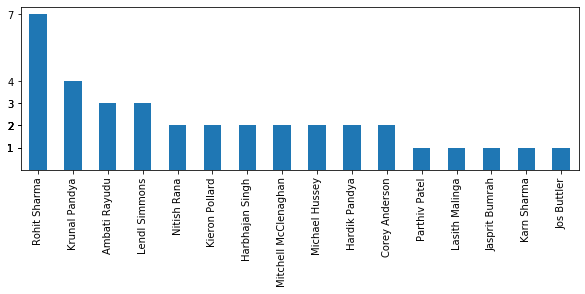

In [21]:
man_of_the_match.plot.bar(figsize=(10,3),xticks=man_of_the_match,yticks=man_of_the_match)
plt.show()

In [22]:
man_of_the_match_overall=wins['player_of_match'].value_counts()

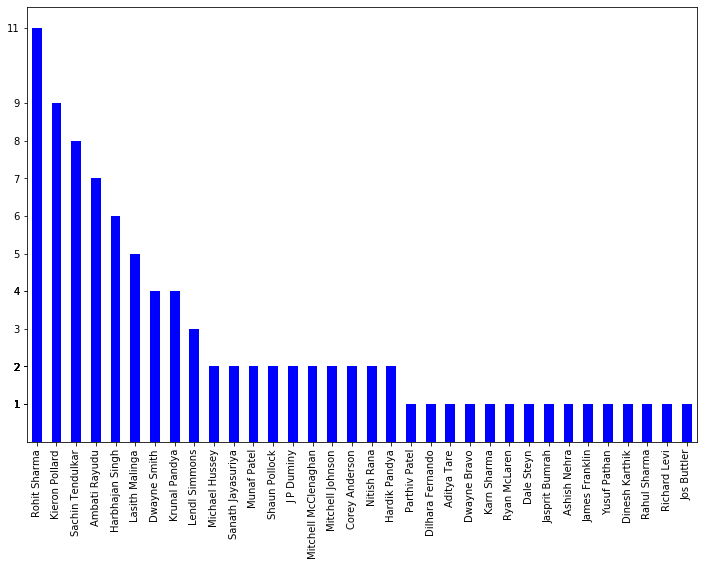

In [24]:
man_of_the_match_overall.plot.bar(figsize=(12,8),xticks=man_of_the_match_overall,yticks=man_of_the_match_overall,color='blue')
plt.show()

<b>MI has stick to players for long time. We can see their match winners. They have retained players and it showed results </b>

In [25]:
wins['team1_id'].unique()

array(['MI', 'KKR', 'RR', 'RCB', 'CSK', 'KXI', 'DD', 'PW', 'DC', 'SRH',
       'RPS', 'GL'], dtype=object)

In [27]:
csk_loss=len(wins[(wins.team1_id =='CSK') | (wins.team2_id=='CSK')]) 
rcb_loss=len(wins[(wins.team1_id =='RCB') | (wins.team2_id=='RCB')]) 
kxi_loss=len(wins[(wins.team1_id =='KXI') | (wins.team2_id=='KXI')])
dd_loss=len(wins[(wins.team1_id =='DD') | (wins.team2_id=='DD')])
rr_loss=len(wins[(wins.team1_id =='RR') | (wins.team2_id=='RR')])
dc_loss=len(wins[(wins.team1_id =='DC') | (wins.team2_id=='DC')])
kkr_loss=len(wins[(wins.team1_id =='KKR') | (wins.team2_id=='KKR')])
srh_loss=len(wins[(wins.team1_id =='SRH') | (wins.team2_id=='SRH')])
teams_loss=[csk_loss,rcb_loss,kxi_loss,dd_loss,rr_loss,dc_loss,kkr_loss,srh_loss]
labelss=['CSK','RCB','KXI','DD','RR','DC','KKR','SRH']

In [29]:
data = [go.Bar(
            x=labelss,
            y=teams_loss,
            marker=dict(color=['#F9F606','#FF0000','#FB5304','#4404FB','#FB04D9','#0939FA','#000000','#FA9B09']), 
            name="Wins",            
    )]
layout = go.Layout(
    showlegend=False,
    xaxis=dict(tickangle=-45,tickmode='linear',title='Teams', titlefont=dict(
            size=16,
        
        )),title='MI vs Different teams',   
         yaxis=dict(
        title='Number Of Wins',
        titlefont=dict(
            size=16
        ),
        tickfont=dict(
            size=14
        )
    ),
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='style-bar',show_link=False)

<b>It would be better if instead of number of wins we used win percentage</b>

In [31]:
csk_matches=len(df_mi_matches[(df_mi_matches.team1_id =='CSK') | (df_mi_matches.team2_id=='CSK')]) 
rcb_matches=len(df_mi_matches[(df_mi_matches.team1_id =='RCB') | (df_mi_matches.team2_id=='RCB')]) 
kxi_matches=len(df_mi_matches[(df_mi_matches.team1_id =='KXI') | (df_mi_matches.team2_id=='KXI')])
dd_matches=len(df_mi_matches[(df_mi_matches.team1_id =='DD') | (df_mi_matches.team2_id=='DD')])
rr_matches=len(df_mi_matches[(df_mi_matches.team1_id =='RR') | (df_mi_matches.team2_id=='RR')])
dc_matches=len(df_mi_matches[(df_mi_matches.team1_id =='DC') | (df_mi_matches.team2_id=='DC')])
kkr_matches=len(df_mi_matches[(df_mi_matches.team1_id =='KKR') | (df_mi_matches.team2_id=='KKR')])
srh_matches=len(df_mi_matches[(df_mi_matches.team1_id =='SRH') | (df_mi_matches.team2_id=='SRH')])
teams_matches=[csk_matches,rcb_matches,kxi_matches,dd_matches,rr_matches,dc_matches,kkr_matches,srh_matches]
labelss=['CSK','RCB','KXI','DD','RR','DC','KKR','SRH']

In [32]:
res_list = [teams_loss[i]/teams_matches[i]*100 for i in range(len(teams_matches))]

In [35]:
data = [go.Bar(
            x=labelss,
            y=res_list,
            marker=dict(color=['#F9F606','#FF0000','#FB5304','#4404FB','#FB04D9','#0939FA','#000000','#FA9B09']), 
            name="Wins",            
    )]
layout = go.Layout(
    showlegend=False,
    xaxis=dict(tickangle=-45,tickmode='linear',title='Teams', titlefont=dict(
            size=16,
        
        )),title='MI vs Different teams',   
         yaxis=dict(
        title='Win percentage',
        titlefont=dict(
            size=16
        ),
        tickfont=dict(
            size=14
        )
    ),
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='style-bar',show_link=False)

<b>MI has won 76 % matches against KKR. Complete dominance</b>